In [5]:
import cv2
import numpy as np
import os

In [6]:


def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
l=[]
def extract_unique_slides_mse(video_path, output_folder, mse_threshold=1000):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    vidcap = cv2.VideoCapture(video_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    success, prev_frame = vidcap.read()
    count = 0
    saved_frame = 0
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    slide_times = []
    start_time = 0

    while success:
        success, frame = vidcap.read()
        if not success:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        mse_value = mse(prev_gray, gray)
        prev_gray = gray
        l.append(mse_value)

        current_time = count / fps

        if mse_value > mse_threshold:
            img_path = os.path.join(output_folder, f"slide_{saved_frame}.png")
            cv2.imwrite(img_path, frame)
            print(f"Saved slide_{saved_frame}.png at time {current_time} seconds")
            end_time = current_time
            slide_times.append((start_time, end_time))
            start_time = current_time
            saved_frame += 1

        count += 1

    vidcap.release()
    print("Done!")

    return slide_times

video_path = "C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\vid.mp4"
output_folder = "C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\slidemse"
slide_times = extract_unique_slides_mse(video_path, output_folder)
dict = {}
for i, (start, end) in enumerate(slide_times):
    dict[i] = (start, end)
print(dict)

Saved slide_0.png at time 2.966666666666667 seconds
Saved slide_1.png at time 6.7 seconds
Saved slide_2.png at time 10.033333333333333 seconds
Saved slide_3.png at time 15.766666666666667 seconds
Saved slide_4.png at time 97.83333333333333 seconds
Saved slide_5.png at time 124.4 seconds
Saved slide_6.png at time 153.16666666666666 seconds
Saved slide_7.png at time 196.3 seconds
Saved slide_8.png at time 270.3333333333333 seconds
Saved slide_9.png at time 284.8 seconds
Saved slide_10.png at time 340.1 seconds
Saved slide_11.png at time 426.93333333333334 seconds
Done!
{0: (0, 2.966666666666667), 1: (2.966666666666667, 6.7), 2: (6.7, 10.033333333333333), 3: (10.033333333333333, 15.766666666666667), 4: (15.766666666666667, 97.83333333333333), 5: (97.83333333333333, 124.4), 6: (124.4, 153.16666666666666), 7: (153.16666666666666, 196.3), 8: (196.3, 270.3333333333333), 9: (270.3333333333333, 284.8), 10: (284.8, 340.1), 11: (340.1, 426.93333333333334)}


In [7]:
import cv2
import pytesseract
import os
# Set the tesseract path in the script before calling image_to_string
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
dicts = {}

def extract_text_from_image(image_path):
    for i, img_file in enumerate(os.listdir(image_path)):
        img = cv2.imread(os.path.join(image_path, img_file))

        # Use pytesseract to extract text
        text = pytesseract.image_to_string(img)
        #add the text to a dictionary
        dicts[i] = text

    return dicts

image_path = "C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\slidemse"
dicts = extract_text_from_image(image_path)
print(dicts)

{0: '& °\n‘ _universite\n\nCentraleSupélec |. PARIS-SACLAY\n\nChapter II\nModeling with PDEs & Classification\n\nPartial Differential Equations\nJohn Cagnol\n\n', 1: '& °\n‘ _untversite\n\nCentraleSupélec | PARIS-SACLAY\n\nPartial Differential Equations\nJohn Cagnol\n', 2: '&% université Well-Posedness\n\nCentraleSupélec | PARIS-SACLAY\n\nDefinition\nLet E and F be two spaces. Let f € F bea dataand A: E — F. Weare\nlooking for solutions u € E to A(u) = f (the PDE).\n\nThe PDE is well-posed in the sense of Hadamard if:\nP asolution u exists,\nP the solution u is unique,\n\n> uchanges “continuously” with respect tof.\n\nA PDE that is not well-posed is said to be ill-posed\n\n', 3: 'Well-Posedness\n\nLet E and F be two spaces. Let f € F beadataand A: E — F. Weare\nlooking for solutions u € E to A(u) = f (the PDE).\n\nuniversité\nCentraleSupélec | PARIS-SACLAY\n\nThe PDE is well-posed in the sense of Hadamard if:\n> asolution u exists,\nP the solution u is unique,\n> uchanges “continuously

In [8]:
import json
def combine_dicts(dict1, dict2):
    combined = {}
    for i in range(len(dict1)):
        combined[i] = {
            "path": f"C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\slidemse\\slide_{i}.png",
            "start": dict1[i][0],
            "end": dict1[i][1],
            "descrp": dict2[i]
        }
    return json.dumps(combined, indent=4)

combined_json = combine_dicts(dict, dicts)
print(combined_json)

{
    "0": {
        "path": "C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\slidemse\\slide_0.png",
        "start": 0,
        "end": 2.966666666666667,
        "descrp": "& \u00b0\n\u2018 _universite\n\nCentraleSup\u00e9lec |. PARIS-SACLAY\n\nChapter II\nModeling with PDEs & Classification\n\nPartial Differential Equations\nJohn Cagnol\n\n"
    },
    "1": {
        "path": "C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\slidemse\\slide_1.png",
        "start": 2.966666666666667,
        "end": 6.7,
        "descrp": "& \u00b0\n\u2018 _untversite\n\nCentraleSup\u00e9lec | PARIS-SACLAY\n\nPartial Differential Equations\nJohn Cagnol\n"
    },
    "2": {
        "path": "C:\\Users\\marou\\Desktop\\VIDEO2BLOG\\slidemse\\slide_2.png",
        "start": 6.7,
        "end": 10.033333333333333,
        "descrp": "&% universit\u00e9 Well-Posedness\n\nCentraleSup\u00e9lec | PARIS-SACLAY\n\nDefinition\nLet E and F be two spaces. Let f \u20ac F bea dataand A: E \u2014 F. Weare\nlooking for solutions u \u20ac E 

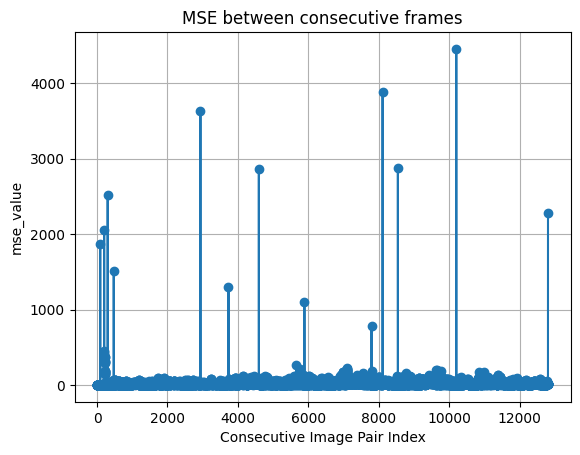

In [9]:
import matplotlib.pyplot as plt
plt.plot(l, marker='o', linestyle='-')
plt.title('MSE between consecutive frames')
plt.xlabel('Consecutive Image Pair Index')
plt.ylabel('mse_value')
plt.grid(True)
plt.show()

In [7]:
import numpy as np
from skimage.filters import threshold_otsu

# Convert your list 'l' to a numpy array
l_array = np.array(l)

# Compute Otsu's threshold
otsu_threshold = threshold_otsu(l_array)

print(f"Otsu's threshold value is: {otsu_threshold}")


Otsu's threshold value is: 2449.7757869720463


In [10]:
with open('combined.json', 'w') as f:
    f.write(combined_json)